In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
data = pd.read_csv("DataFromGuidline-Table 1.csv", encoding='utf-8')

In [3]:
data.shape

(800, 34)

In [4]:
data.head(799)

,DiscoveredPath,DiseaseName,PatientSatus&Condition,Suggestion&Recommendation,SignandSymptoms,WhentoAssess and How long have been,Type,Temperature>=38,BP,Fever,...,AbdominalORBackPain,Proteinuria,BodyPainor pain or chest pain,Weakness,FetalHeartRate,SmellyVaginalDischarge,RH-,SuddenGushorPaleFluid,chorioamnionitis,BleedingSatus
0,ConsiderationPath,BreastSymptoms,NotBreastFeeding,If on hormonal contraceptive consider non-horm...,BothBreastswith/withoutPain,NaN,BrustLumps,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ConsiderationPath,BreastSymptoms,NotBreastFeeding,May be a side effect of hormonal contraceptive...,NaN,NaN,BreastPain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ConsiderationPath,BreastSymptoms,NotBreastFeeding,Check axilla for lymph node (18)\n,NaN,NaN,RashonBreast,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ConsiderationPath,BreastSymptoms,NotBreastFeeding,if none of the above (53),NaN,NaN,RashonBreast,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ConsiderationPath,PregnantPatient,ConvlsingorJustHadaConvulsion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ConsiderationPath,PregnantPatient,FetalMovements,Decreased/absent fetal movement,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ConsiderationPath,AntenatalCare,NoorNotsureABout the pregnancy,Discuss future contraception 110.,"pregnant following incest or rape, severe ment...",NaN,Patient requests abortion,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ConsiderationPath,AntenatalCare,SymptomsExist,Consider the pregnant symptoms path,Manage symptoms as on symptom pages. Check if ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ConsiderationPath,AntenatalCare,TB,Consider path 71,"If cough > 2 weeks, weight loss, night sweats ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ConsiderationPath,AntenatalCare,MentalHealth,Consider path 99,"In the past month, has patient: felt depressed...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
getClinicalPath = data.DiscoveredPath
countClincalPath = getClinicalPath.value_counts()

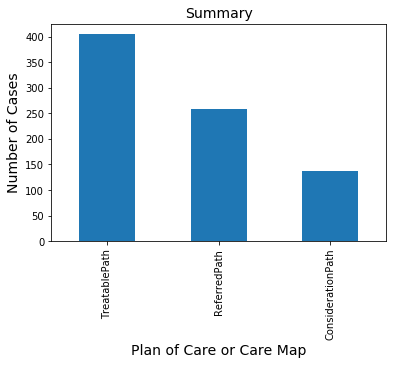

In [6]:
plt.title('Summary', fontsize=14)
plt.xlabel('Plan of Care or Care Map', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True)
countClincalPath.plot(kind='bar')

In [7]:
countClincalPath

TreatablePath        405
ReferredPath         258
ConsiderationPath    137
Name: DiscoveredPath, dtype: int64

In [8]:
diseaseList = data.DiseaseName
countDiseaseList = diseaseList.value_counts()

In [9]:
#xx =data.DiseaseName == 'PregnantPatient'

In [10]:
data.head(2)

,DiscoveredPath,DiseaseName,PatientSatus&Condition,Suggestion&Recommendation,SignandSymptoms,WhentoAssess and How long have been,Type,Temperature>=38,BP,Fever,...,AbdominalORBackPain,Proteinuria,BodyPainor pain or chest pain,Weakness,FetalHeartRate,SmellyVaginalDischarge,RH-,SuddenGushorPaleFluid,chorioamnionitis,BleedingSatus
0,ConsiderationPath,BreastSymptoms,NotBreastFeeding,If on hormonal contraceptive consider non-horm...,BothBreastswith/withoutPain,NaN,BrustLumps,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ConsiderationPath,BreastSymptoms,NotBreastFeeding,May be a side effect of hormonal contraceptive...,NaN,NaN,BreastPain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


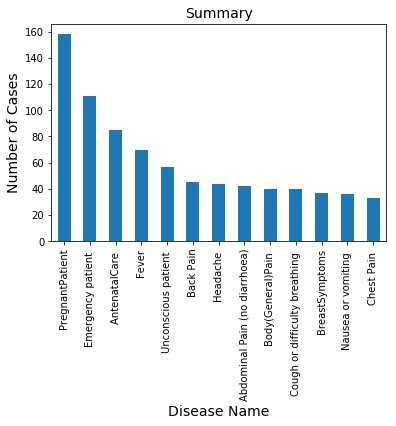

In [11]:
plt.title('Summary', fontsize=14)
plt.xlabel('Disease Name', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.grid(True)
countDiseaseList.plot(kind='bar')

In [12]:
print('Number of Path Sample:', len(data))

Number of Path Sample: 800


In [13]:
data.groupby('DiscoveredPath').size()

DiscoveredPath
ConsiderationPath    137
ReferredPath         258
TreatablePath        405
dtype: int64

In [14]:
data.groupby('DiseaseName').size()

DiseaseName
Abdominal Pain (no diarrhoea)      42
AntenatalCare                      85
Back Pain                          45
Body(General)Pain                  40
BreastSymptoms                     37
Chest Pain                         33
Cough or difficulty breathing      40
Emergency patient                 111
Fever                              70
Headache                           44
Nausea or vomiting                 36
PregnantPatient                   158
Unconscious patient                57
dtype: int64

In [15]:
def calc_treatable(DiscoveredPath):
    x=data.DiscoveredPath
    return (len(x)/len(DiscoveredPath))

In [16]:
x = data.DiscoveredPath
len(x)

800

In [17]:
y = data.DiscoveredPath
y.value_counts()

TreatablePath        405
ReferredPath         258
ConsiderationPath    137
Name: DiscoveredPath, dtype: int64

In [18]:
data[['DiscoveredPath','DiseaseName']].head(1)

,DiscoveredPath,DiseaseName
0,ConsiderationPath,BreastSymptoms


In [19]:
newdata = data.sample(n=len(data), random_state=42)

In [20]:
# save 30% of the data as validation and test data
newdata_valid_test=newdata.sample(frac=0.30,random_state=42)
print('Split size %.3f'%(len(newdata_valid_test)/len(newdata)))

Split size 0.300


In [21]:
#And now split into test and validation using 50% fraction.
newdata_test = newdata_valid_test.sample(frac=0.50,random_state=42)
newdata_valid = newdata_valid_test.drop(newdata_test.index)

In [22]:
newdata_test.shape

(120, 34)

In [23]:
newdata_valid.shape

(120, 34)

In [24]:
# use the rest if the data as training data
newdata_train_all=newdata.drop(newdata_test.index)

In [25]:
newdata_train_all.shape

(680, 34)

In [26]:
#split the training data into treatable, reffered and consideration path
#rows_treatable = newdata_train_all.DiscoveredPath == 1
#newdata_train_TreatablePath = newdata_train_all[rows_treatable]
#newdata_train_ReferredPath = newdata_train_all[~rows_treatable]